In [1]:
import io
import sys
import pdfminer
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfparser import PDFParser
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine


In [2]:
fp = open('t.pdf', 'rb')
rsrcmgr = PDFResourceManager()
retstr = io.StringIO()
codec = 'utf-8'
laparams = LAParams()
device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
# Create a PDF interpreter object.
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.

for page in PDFPage.get_pages(fp):
    interpreter.process_page(page)
    data =  retstr.getvalue()

#print(data)

FileNotFoundError: [Errno 2] No such file or directory: 't.pdf'

In [ ]:
extracted_text = ""


In [ ]:
fp = open('t.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
            extracted_text += lt_obj.get_text()
            print(lt_obj.get_text())

fp.close()

In [3]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)


In [4]:
import spacy

In [5]:
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import FigureWidget
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
#import en_core_web_sm
#nlp = spacy.load('en_core_web_md')


Loading BokehJS ...

In [ ]:
from spacy.lang.en import English
import en_core_web_sm



In [6]:
text = data.split('\n')

In [7]:
df = pd.DataFrame(text, columns = ['text'])
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

df.head()

,text
0,"See discussions, stats, and author profiles fo..."
1,
2,Deep learning and its applications to machine ...
3,
4,Article in Mechanical Systems and Signal Pro...


In [ ]:
df['text']

In [ ]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

df.head(1)

# Top unigrams before removing stop words


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

In [ ]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

df1.head()

In [ ]:
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

# Top unigrams after removing stop words


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

In [ ]:
submission = pd.DataFrame({"Keywords":df2['ReviewText'], "Count":df2['count']})
submission.to_csv("keywords.csv", index=False)

In [ ]:
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

# Top bigrams after removing stop words

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

In [ ]:
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

# Top trigrams after removing stop words


In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

In [ ]:
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

# Top 20 part-of-speech tagging of review corpus


In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

# Topic Modeling with LSA (Latent Semantic Analysis)
#https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

In [ ]:
reindexed_data = df['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [ ]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [ ]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [ ]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

In [ ]:

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

# Text Summarization

In [ ]:
from gensim.summarization.summarizer import summarize


In [ ]:
extracted_text

In [ ]:
print(summarize(extracted_text))

## Word cloud

In [8]:
from wordcloud import WordCloud, STOPWORDS 


In [11]:
data

"See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/326029031\n\nDeep learning and its applications to machine health monitoring\n\nArticle\xa0\xa0in\xa0\xa0Mechanical Systems and Signal Processing · January 2019\n\nDOI: 10.1016/j.ymssp.2018.05.050\n\nCITATIONS\n11\n\n6 authors, including:\n\nRui Zhao\nNanyang Technological University\n\n25 PUBLICATIONS\xa0\xa0\xa0403 CITATIONS\xa0\xa0\xa0\n\nSEE PROFILE\n\nZhenghua Chen\nNanyang Technological University\n\n22 PUBLICATIONS\xa0\xa0\xa0385 CITATIONS\xa0\xa0\xa0\n\nSEE PROFILE\n\nREADS\n1,382\n\nRuqiang Yan\nXi'an Jiaotong University\n\n155 PUBLICATIONS\xa0\xa0\xa03,169 CITATIONS\xa0\xa0\xa0\n\nSEE PROFILE\n\nPeng Wang\nCase Western Reserve University\n\n41 PUBLICATIONS\xa0\xa0\xa0188 CITATIONS\xa0\xa0\xa0\n\nSEE PROFILE\n\nSome of the authors of this publication are also working on these related projects:\n\nDeep Learning for Dynamical System Estimation and Prediction View projec

In [9]:
wordcloud = WordCloud().generate(data)


(-0.5, 399.5, 199.5, -0.5)

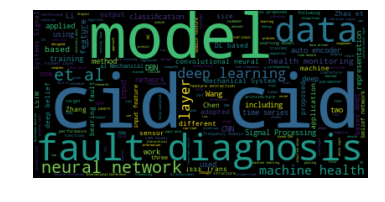

In [10]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(data)

plt.figure(figsize=[10,10])

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("word_cld.png", format="png")